<p align="center">
  <img width="600" height="300" src="https://github.com/RAHXION/logo/blob/main/RAHXION_Logo.png?raw=true">
</p>



## <center> Cálculo del volumen original de hidrocarburos </center>
## <center> Aplicación del método de simulación Montecarlo </center>
##### Siguenos en nuestras redes sociales:  [LinkedIn](https://www.linkedin.com/company/rahxion/)

**RAHXION** es un consorcio de geomodelado, ingeniería y optimización que tiene como objetivo principal proporcionar soluciones prácticas para mantener, optimizar e incrementar la producción de hidrocarburos, así como también proveer soluciones efectivas a los retos tecnológicos que enfrentan las áreas de exploración y explotación de petróleo y gas.

# Resumen ejecutivo

El desarrollo de un campo petrolero está en función del volumen de hidrocarburos en sitio el cual puede ser estimado de forma volumétrica y probabilística a partir del método de simulación Montecarlo. Para aplicar el método es necesario conocer la extensión del yacimiento, así como su configuración petrofísica y estructural, adicionalmente se requieren conocer las condiciones de presión y temperatura del yacimiento y tipo de fluido a producir.

Durante la sesión se presentarán conceptos y definiciones relacionados con el tema y un caso de aplicación del cálculo de volumen original de hidrocarburos en un campo de gas el cual cuenta con datos de perforación y mapeo de propiedades petrofísicas para definir la cantidad de hidrocaburos mediante percentiles de probabilidad.

# Introducción y conceptos

## Librerías

A continuación se presetan las principales librerías a utilizar y una breve descripción de sus características:

## Volumen de hidrocarburos en sitio

El cálculo de volumen original de gas se puede realizar de forma volumétrica utilizando la siguiente expresión:

\\


$$OGIP=\frac{A*H*\phi*(1-Sw)}{Bg}$$

donde:
* $OGIP$, Original Gas In Place
* $A$, área o extensión del yacimiento
* $H$, espesor neto del yacimiento
* $\phi$, porosidad efectiva
* $Sw$, saturación de gas
* $Bg$, factor de volumen del gas




**Nota**: Para yacimientos de aceite bajosaturado la ecuación descrita anteriormente utiliza el factor de volumen del aceite  $Bo$  en lugar del factor de voumen del gas  $Bg$ y el cálculo se realizará para estimar el aceite original en sitio ($OOIP$, Original Oil In Place)

Nota: Para yacimientos de aceite bajosaturado la ecuación descrita anteriormente utiliza el factor de volumen del aceite  Bo  en lugar del factor de voumen del gas  Bg .

# Ejemplo de aplicación

 A continuación se muestra el cálculo de volumen original para un yacimiemto de gas seco aplicando el método de Simulación de Montecarlo. Las funciones de probabilidad son propuestas partiendo de valores típicos obtenidos de evaluación petrofísica.

In [6]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import math
import random
import ipywidgets as widgetss
from matplotlib.ticker import FormatStrFormatter

In [7]:
# Función para la generación de los datos con una distribución normal
def gen_normal_data(mean, sd, n, bns):
    # np.random.seed(2)
    numbers = np.array([], dtype=np.int64)
    bin_edges_1 = np.array([], dtype=np.float64)
    bin_mid = np.array([], dtype=np.float64)
    bin_edges_2 = np.array([], dtype=np.float64)

    data = np.random.normal(mean, sd, n)
    freq, bins= np.histogram(data, bins=bns, density = False)
    bw = bins[1] - bins[0]

    for i, j in enumerate(range(len(bins)-1)):
        numbers = np.append(numbers, i + 1)
        bin_edges_1 = np.append(bin_edges_1, bins[j])
        bin_mid = np.append(bin_mid, bins[j] + (bins[j+1] - bins[j])/2)
        bin_edges_2 = np.append(bin_edges_2, bins[j+1])

    cum_freq = np.cumsum(freq)/n
    df = pd.DataFrame({"n_bins": numbers, "bin_edges_1": bin_edges_1, 
                        "bin_mid": bin_mid, "bin_edges_2": bin_edges_2,"freq": freq, 
                        "cum_freq": cum_freq})

    return data, bin_mid, df

In [23]:
# Función para construir las gráficas de distribución de probabilidad y probabilidad acumulada
def plot_freq(rv, bin_avg, bns, variable, units, color):
    fig, (ax1, ax2) = plt.subplots(1, 2, dpi=110, figsize=(18, 7.5))
    fig.suptitle(variable.title(), fontsize=20, y=0.95)

    freq, bins= np.histogram(rv, bins=bns, density = False)
    bw = bins[1] - bins[0]
    
    # Graph-1
    ax1.hist(rv, bins=bns, density = False, ec="black", color=color)
    ax1.set_xlabel("bins", fontsize=14, labelpad=10)
    ax1.set_ylabel("Frecuencia", fontsize=14, labelpad=10)
    ax1.tick_params(axis="x", labelsize=12.5)
    ax1.tick_params(axis="y", labelsize=12.5)
    ax1.xaxis.set_major_formatter(FormatStrFormatter('% 1.2f'))

    # Graph-2
    ax2.bar(bin_avg, np.cumsum(freq)/len(rv), color=color, width=bw-(bw/10), ec="black")
    ax2.plot(bin_avg, np.cumsum(freq)/len(rv),'-.ok', alpha=0.7)
    ax2.set_xlabel(f"{variable} ({units})", fontsize=14, labelpad=10)
    ax2.set_ylabel("Frecuencia acumulada", fontsize=14, labelpad=10)
    ax2.tick_params(axis="x", labelsize=12.5)
    ax2.tick_params(axis="y", labelsize=12.5)
    ax2.xaxis.set_major_formatter(FormatStrFormatter('%1.2f'))
    plt.tight_layout(pad=2)

### Porosidad

In [9]:
poro, bin_mid_poro, df_poro = gen_normal_data(0.2, 0.03, 1000, 20)

In [10]:
df_poro.head(3)

,n_bins,bin_edges_1,bin_mid,bin_edges_2,freq,cum_freq
0,1,0.111478,0.116800,0.122122,4,0.004
1,2,0.122122,0.127444,0.132767,6,0.010
2,3,0.132767,0.138089,0.143411,31,0.041


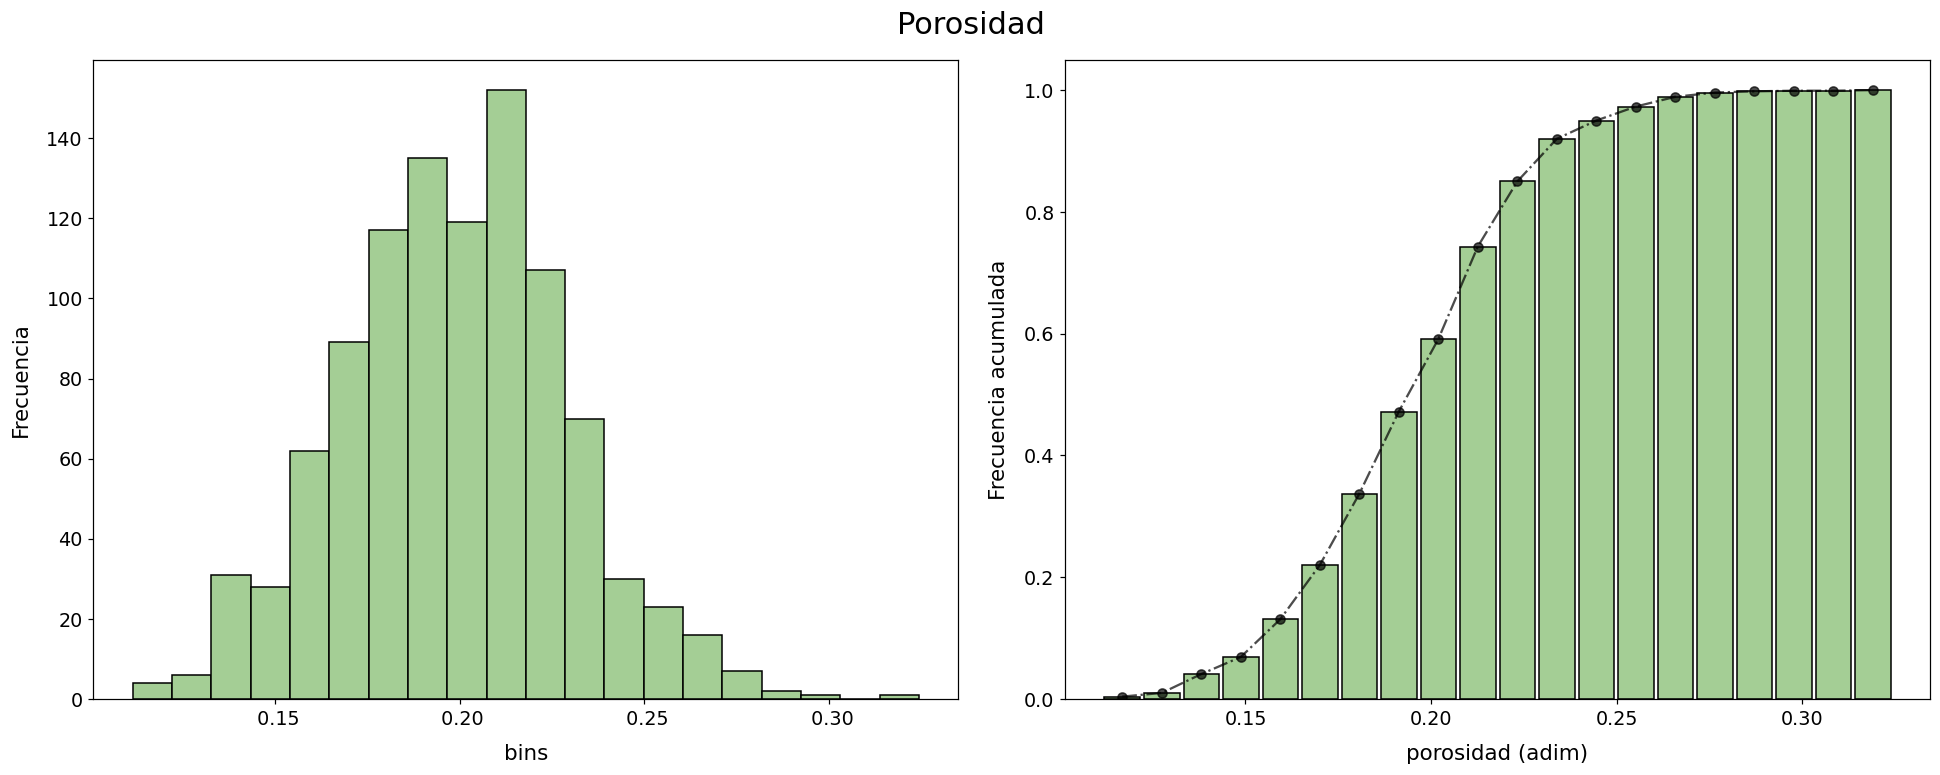

In [24]:
plot_freq(poro, bin_mid_poro, 20, "porosidad", "adim", "#A4CE95")

### Saturación de Agua

In [12]:
sw, bin_mid_sw, df_sw = gen_normal_data(0.33, 0.03, 1000, 20)

In [13]:
df_sw.head(3)

,n_bins,bin_edges_1,bin_mid,bin_edges_2,freq,cum_freq
0,1,0.240742,0.245292,0.249841,3,0.003
1,2,0.249841,0.254391,0.258940,11,0.014
2,3,0.258940,0.263490,0.268039,10,0.024


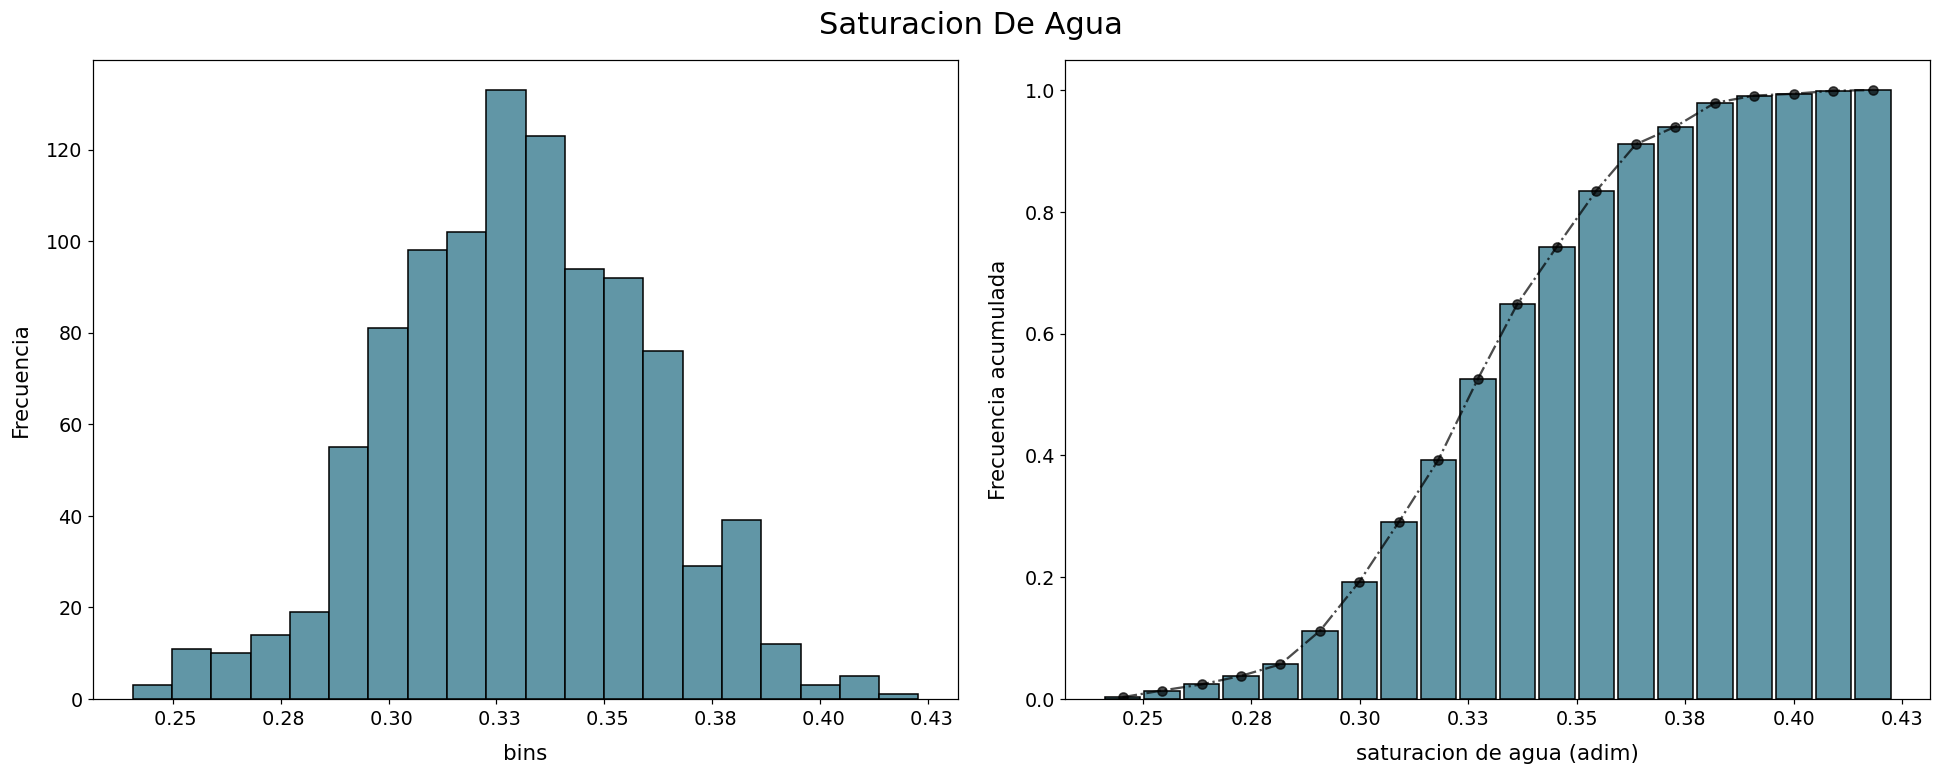

In [25]:
plot_freq(sw, bin_mid_sw, 20, "saturacion de agua", "adim", "#6196A6")

### Espesor

In [26]:
h, bin_mid_h, df_h = gen_normal_data(15, 1.5, 1000, 20)

In [27]:
df_h.head(3)

,n_bins,bin_edges_1,bin_mid,bin_edges_2,freq,cum_freq
0,1,10.542231,10.753323,10.964414,3,0.003
1,2,10.964414,11.175505,11.386597,6,0.009
2,3,11.386597,11.597688,11.808779,10,0.019


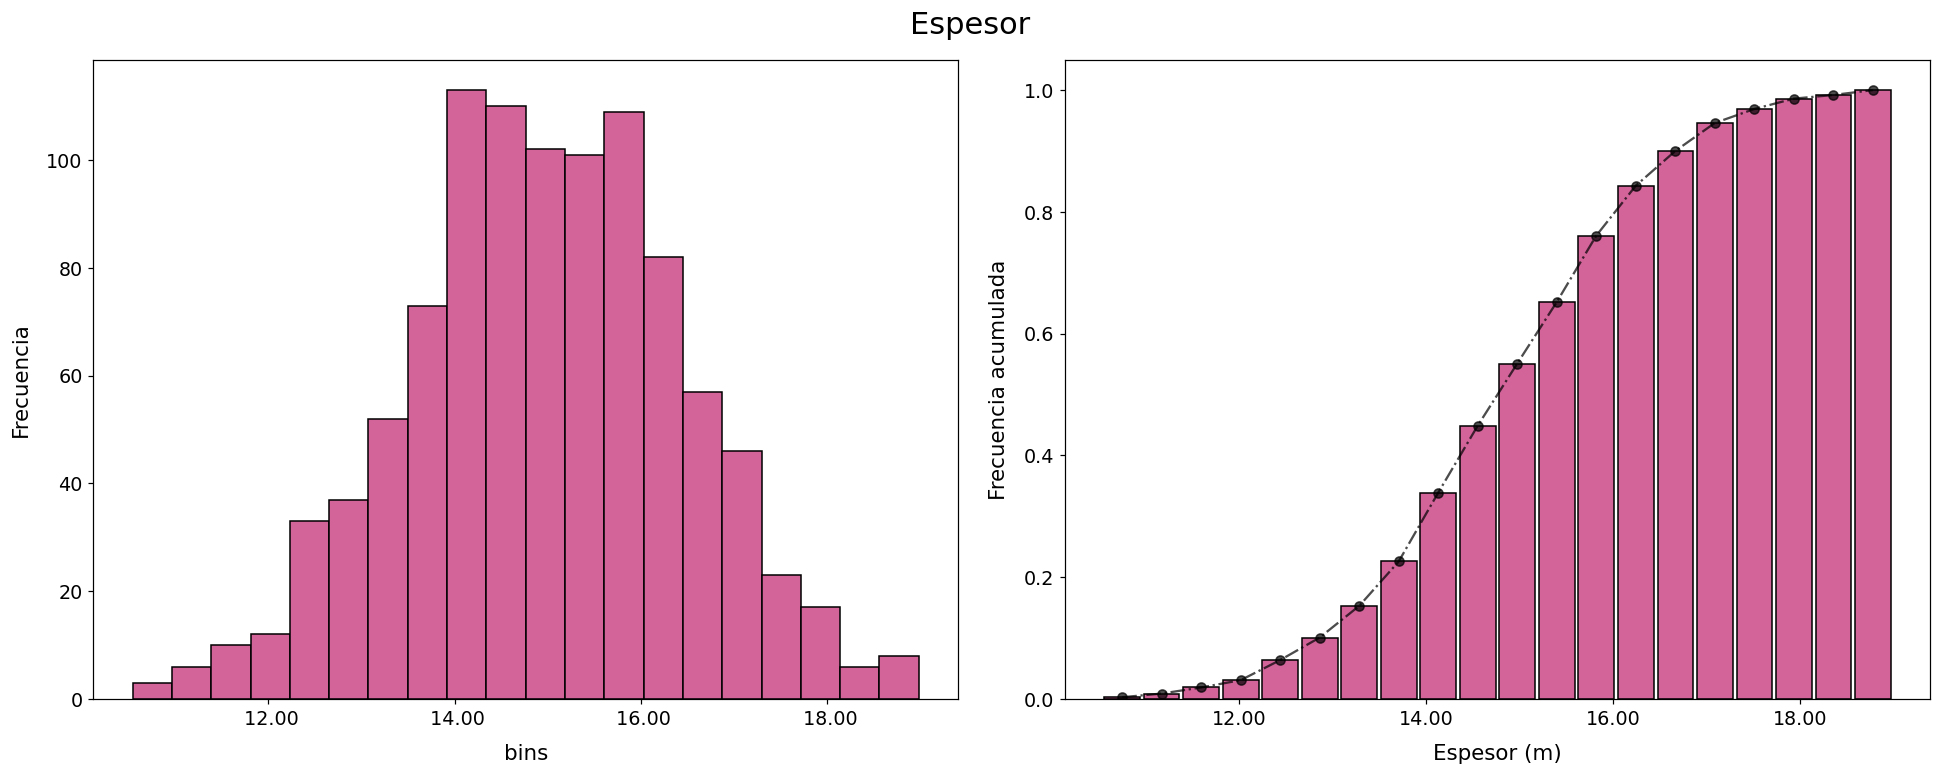

In [29]:
plot_freq(h, bin_mid_h, 20, "Espesor", "m", "#D2649A")

## Área y fluidos

In [30]:
'''Definición del área del yacimiento El área puede ser una variable dentro
del proceso de simulación Si la delimitación del yacimiento es adecuada se
puede tomar como un valor fijo'''
A= 1.72 # Área km2

In [31]:
# Área y factor de volumen del gas
# Presión de yacimiento 7000 psi
# Temperatura de yacimiento 128°C
Bg = 0.003 # m3/sm3

<p align="left">
  <img width="700"
   height="400"
   src="https://github.com/RAHXION/Python-y-reservas/blob/main/5.-%20Volumetr%C3%ADa%20de%20yacimientos/5.2-Montecarlo/Bg.png?raw=true">
</p>

## Simulación Montecarlo

Una vez se tiene la distribución de probabilidad de los parámetros de yacimiento involucrados en el cálculo del volumen original de hidrocarburos, se realiza un proceso iterativo con valores aleatorios de probabilidad para cada una de las variables de interés, los valores aleatorios son utilizados en la función objetivo para tener una estimación de probabilística del volumen de hidrocarburos y definir los percentiles de probabilidad del volumen de hidrocarburos (P10, P50, P90).

In [32]:
# Función para generar los datos del Volumen Original del Gas
def gen_ogip_data(poro, sw, h, values, A, Bg, bns):
    # random.seed(2)
    values = values
    ogip = np.array([], dtype=np.float64)
    numbers = np.array([], dtype=np.int64)
    
    # Porosity - phi
    bin_mid_poro = np.array([], dtype=np.float64)
    freq_poro, bins_poro = np.histogram(poro, bins=bns, density = False)
    bw_poro = bins_poro[1] - bins_poro[0]

    for i, j in enumerate(range(len(bins_poro)-1)):
        bin_mid_poro = np.append(bin_mid_poro, bins_poro[j] + (bins_poro[j+1] - bins_poro[j])/2)

    cum_freq_poro = np.cumsum(freq_poro)/values

    # Water saturation - sw
    bin_mid_sw = np.array([], dtype=np.float64)
    freq_sw, bins_sw = np.histogram(sw, bins=bns, density = False)
    bw_sw = bins_sw[1] - bins_sw[0]

    for i, j in enumerate(range(len(bins_sw)-1)):
        bin_mid_sw = np.append(bin_mid_sw, bins_sw[j] + (bins_sw[j+1] - bins_sw[j])/2)

    cum_freq_sw = np.cumsum(freq_sw)/values

    # Reservoir thickness - h
    bin_mid_h = np.array([], dtype=np.float64)
    freq_h, bins_h = np.histogram(h, bins=bns, density = False)
    bw_h = bins_h[1] - bins_h[0]

    for i, j in enumerate(range(len(bins_h)-1)):
        bin_mid_h = np.append(bin_mid_h, bins_h[j] + (bins_h[j+1] - bins_h[j])/2)

    cum_freq_h = np.cumsum(freq_h)/values

    # Original Gas-in place - ogip
    bin_edges_1_ogip = np.array([], dtype=np.float64)
    bin_mid_ogip = np.array([], dtype=np.float64)
    bin_edges_2_ogip = np.array([], dtype=np.float64)
    
    for value in range(values):
        poro = random.uniform(min(cum_freq_poro), max(cum_freq_poro))
        sw = random.uniform(min(cum_freq_sw), max(cum_freq_sw))
        h = random.uniform(min(cum_freq_h), max(cum_freq_h))
        poro_val = np.interp(poro, cum_freq_poro, bin_mid_poro)
        sw_val = np.interp(sw, cum_freq_sw, bin_mid_sw)
        h_val = np.interp(h, cum_freq_h, bin_mid_h)

        gas_vol = A * 1000**2 * h_val * poro_val * (1 - (sw_val)) * 3.28**3 / (Bg*1e9)
        ogip = np.append(ogip, gas_vol)

    freq_ogip, bins_ogip = np.histogram(ogip, bins=bns, density = False)
    bw_ogip = bins_ogip[1] - bins_ogip[0]

    for i, j in enumerate(range(len(bins_ogip)-1)):
        numbers = np.append(numbers, i + 1)
        bin_edges_1_ogip = np.append(bin_edges_1_ogip, bins_ogip[j])
        bin_mid_ogip = np.append(bin_mid_ogip, bins_ogip[j] + (bins_ogip[j+1] - bins_ogip[j])/2)
        bin_edges_2_ogip = np.append(bin_edges_2_ogip, bins_ogip[j+1])

    cum_freq_ogip = np.cumsum(freq_ogip)/values
    df_ogip = pd.DataFrame({"n_bins": numbers, "bin_edges_1": bin_edges_1_ogip, "bin_mid": bin_mid_ogip, 
                        "bin_edges_2": bin_edges_2_ogip,"freq": freq_ogip, "cum_freq": cum_freq_ogip})

    return ogip, bin_mid_ogip, df_ogip

In [33]:
ogip, bin_mid_ogip, df_ogip = gen_ogip_data(poro, sw, h, 1000, A, Bg, 20)

### Original Gas-in Place

In [34]:
ogip, bin_mid_ogip, df_ogip = gen_ogip_data(poro, sw, h, 1000, A, Bg, 20)

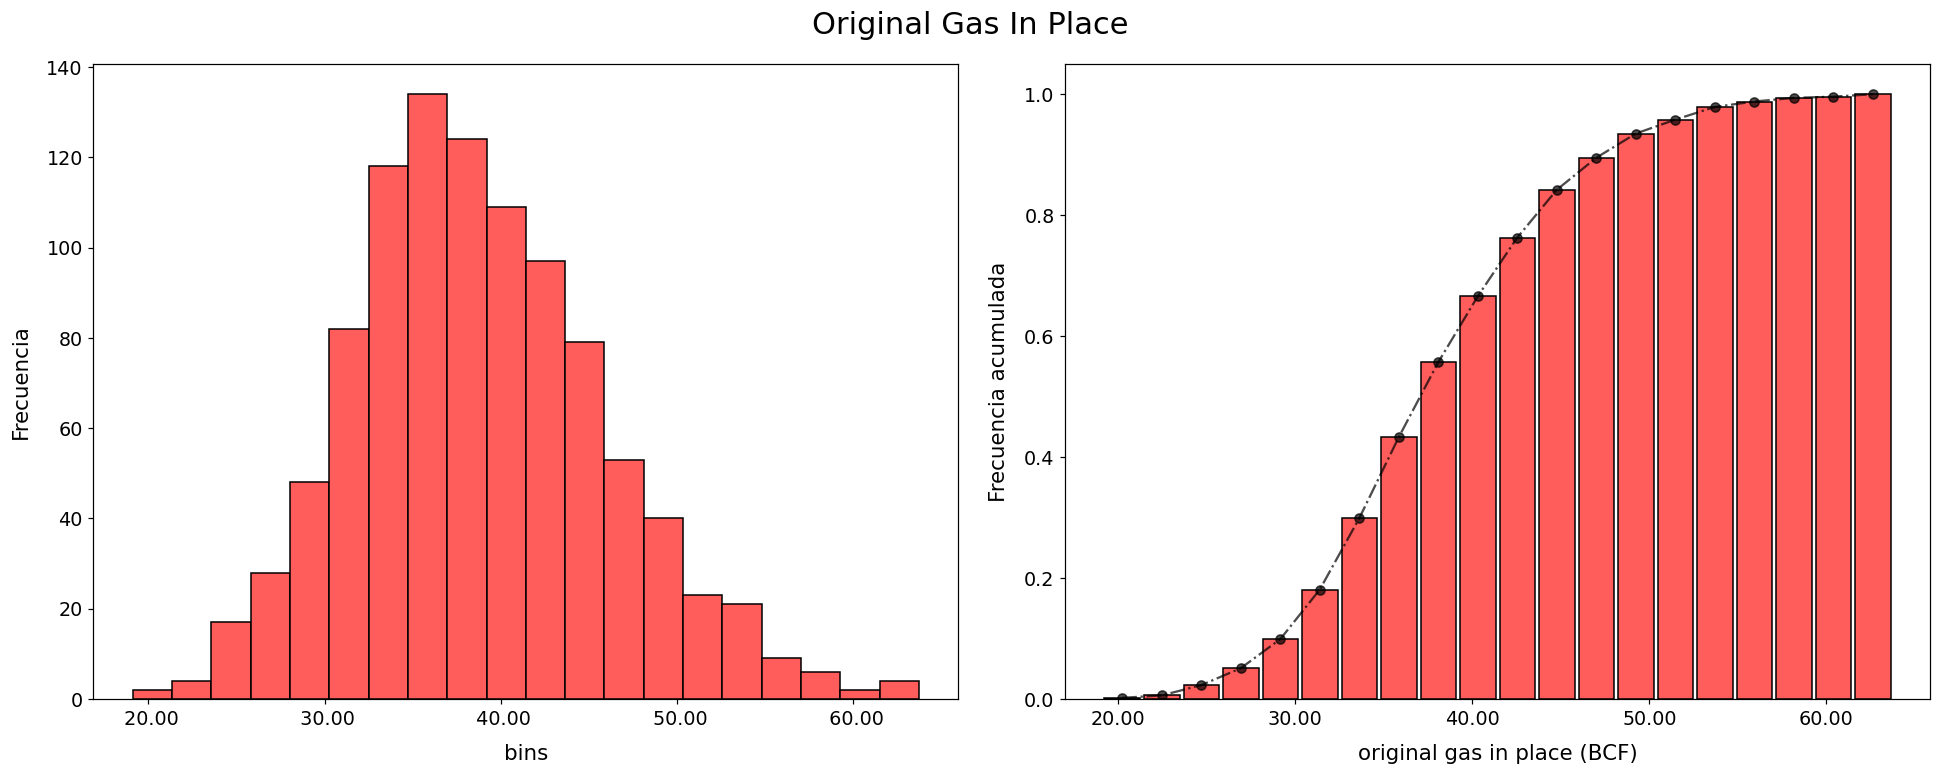

In [35]:
plot_freq(ogip, bin_mid_ogip, 20, "original gas in place", "BCF", "#FF5C5C")

In [37]:
df_ogip.head(3)

,n_bins,bin_edges_1,bin_mid,bin_edges_2,freq,cum_freq
0,1,19.116994,20.232410,21.347826,2,0.002
1,2,21.347826,22.463242,23.578658,4,0.006
2,3,23.578658,24.694074,25.809490,17,0.023


### Percentiles

In [38]:
# P10
P10 = np.percentile(ogip, 10)
# P10 = np.interp(0.1, cum_freq_ogip, bin_mid_ogip)

# P50
P50 = np.percentile(ogip, 50)
# P50 = np.interp(0.5, cum_freq_ogip, bin_mid_ogip)

# P90
P90 = np.percentile(ogip, 90)
# P90 = np.interp(0.9, cum_freq_ogip, bin_mid_ogip)

print(P10)
print(P50)
print(P90)

30.394523040395388
38.15829069058367
48.37611757274822


# Conclusiones y comentarios

* El método de Montecarlo para estimación de hidrocarburos permite combinar los estudios de caracterización estática e ingeniería de yacimientos para dar una evaluación del potencial de hidrocarburos en sitio.

* Proporcionar valores de probabilidad de ocurrencia de los volúmenes de hidrocarburos permite identificar el riesgo involucrado en el desarrollo de un campo petrolero.

* Es fundamental la calidad de los datos petrofísicos y de correlación para delimitación del yacimiento y distribución de propiedades ya que estos influyen directamente en el cálculo.

* Para validar los resultados volumétricos obtenidos es recomendable realizar estudios de ingeniería adicionales como pruebas de presión, análisis de comportamiento de producción y estudios de simulación numérica de yacimientos.